In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matploblib inline

UsageError: Line magic function `%matploblib` not found.


In [2]:
data=pd.read_csv(r"C:\Users\sathish kumar\Downloads\titanic_data.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
data.shape

(891, 12)

In [6]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Percentage of females who survived: 74.20382165605095
Percentage of males who survived: 18.890814558058924


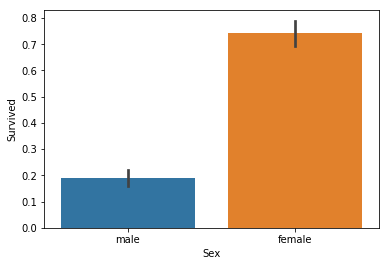

In [9]:
#draw a bar plot of survival by Sex
sns.barplot(x="Sex", y="Survived", data=data)

print("Percentage of females who survived:", data["Survived"][data["Sex"] == 'female'].value_counts(normalize = True)[1]*100)
print("Percentage of males who survived:", data["Survived"][data["Sex"] == 'male'].value_counts(normalize = True)[1]*100)

Percentage of Pclass = 1 who survived: 62.96296296296296
Percentage of Pclass = 2 who survived: 47.28260869565217
Percentage of Pclass = 3 who survived: 24.236252545824847


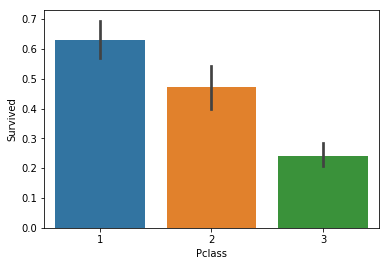

In [10]:
#draw a bar plot of survival by Pclass
sns.barplot(x="Pclass", y="Survived", data=data)

print("Percentage of Pclass = 1 who survived:", data["Survived"][data["Pclass"] == 1].value_counts(normalize = True)[1]*100)
print("Percentage of Pclass = 2 who survived:", data["Survived"][data["Pclass"] == 2].value_counts(normalize = True)[1]*100)
print("Percentage of Pclass = 3 who survived:", data["Survived"][data["Pclass"] == 3].value_counts(normalize = True)[1]*100)

In [11]:
data['Age'].fillna(data['Age'].mean(), inplace=True)

In [12]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [13]:
data['Embarked'].mode()

0    S
dtype: object

In [14]:
data['Embarked'].fillna(value="S", inplace=True)

In [15]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [16]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [17]:
data=data.drop(['PassengerId','Name','Cabin','Ticket', 'Fare'],axis=1)

In [18]:
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [19]:
from sklearn.utils import resample

In [20]:
# Separate majority and minority classes
majority = data[data.Survived==0]
minority = data[data.Survived==1]
 
# Upsample minority class
minority_upsampled = resample(minority, 
                              replace=True,     # sample with replacement
                              n_samples=549,    # to match majority class
                              random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
data = pd.concat([majority,minority_upsampled])
 
# Display new class counts
data.Survived.value_counts()

1    549
0    549
Name: Survived, dtype: int64

In [21]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.000000,1,0,S
4,0,3,male,35.000000,0,0,S
5,0,3,male,29.699118,0,0,Q
6,0,1,male,54.000000,0,0,S
7,0,3,male,2.000000,3,1,S


In [22]:
data.shape

(1098, 7)

In [23]:
#data['Survived']=data['Survived'].map({0:"Dead",1:"Alive"})

In [24]:
data=data.rename(columns={"Survived":"Survival_Status"})

In [25]:
data.head()

,Survival_Status,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.000000,1,0,S
4,0,3,male,35.000000,0,0,S
5,0,3,male,29.699118,0,0,Q
6,0,1,male,54.000000,0,0,S
7,0,3,male,2.000000,3,1,S


In [26]:
data['Age'] = data['Age'].apply(np.floor)

In [27]:
data.describe()

,Survival_Status,Pclass,Age,SibSp,Parch
count,1098.000000,1098.000000,1098.000000,1098.000000,1098.000000
mean,0.500000,2.247723,28.938980,0.515483,0.399818
std,0.500228,0.862793,13.528555,1.034605,0.788176
min,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,21.000000,0.000000,0.000000
50%,0.500000,3.000000,29.000000,0.000000,0.000000
75%,1.000000,3.000000,35.000000,1.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000


In [28]:
data.columns

Index(['Survival_Status', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Embarked'],
      dtype='object')

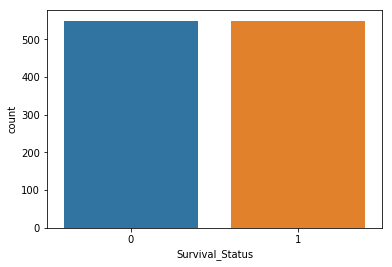

In [29]:
sns.countplot(data["Survival_Status"])

In [30]:
data['Survival_Status'].value_counts()

1    549
0    549
Name: Survival_Status, dtype: int64

In [31]:
#Binning:
def binning(col, cut_points, labels=None):
  #Define min and max values:
  minval = col.min()
  maxval = col.max()

  #create list by adding min and max to cut_points
  break_points = [minval] + cut_points + [maxval]

  #if no labels provided, use default labels 0 ... (n-1)
  if not labels:
    labels = range(len(cut_points)+1)

  #Binning using cut function of pandas
  colBin = pd.cut(col,bins=break_points,labels=labels,include_lowest=True)
  return colBin

#Binning age:
cut_points = [12,19,40]
labels = ["child","Teen","Adults","Seniors"]
data["Age"] = binning(data["Age"], cut_points, labels)
print(pd.value_counts(data["Age"], sort=False))

child      105
Teen       120
Adults     695
Seniors    178
Name: Age, dtype: int64


In [32]:
data.head()

,Survival_Status,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,Adults,1,0,S
4,0,3,male,Adults,0,0,S
5,0,3,male,Adults,0,0,Q
6,0,1,male,Seniors,0,0,S
7,0,3,male,child,3,1,S


In [33]:
data.columns

Index(['Survival_Status', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Embarked'],
      dtype='object')

In [34]:
data['Embarked'].value_counts()

S    765
C    237
Q     96
Name: Embarked, dtype: int64

In [35]:
data['Embarked']=data['Embarked'].map({"S":0,"C":1,"Q":2})

In [36]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
data=data.apply(label.fit_transform)
data.head()

,Survival_Status,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,2,1,0,1,0,0
4,0,2,1,0,0,0,0
5,0,2,1,0,0,0,2
6,0,0,1,1,0,0,0
7,0,2,1,3,3,1,0


In [37]:
#data=pd.get_dummies(data,columns=['Sex','Age','Embarked'])

In [38]:
data.columns

Index(['Survival_Status', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Embarked'],
      dtype='object')

In [39]:
data.shape

(1098, 7)

In [40]:
x=np.array(data[['Pclass','Sex', 'Age', 'SibSp', 'Parch','Embarked']])
y=np.array(data['Survival_Status'])

In [41]:
#X = data.iloc[:, 1:7].values
#y = data.iloc[:, 0].values

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [45]:
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,

In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
test_score=accuracy_score(y_pred,y_test)
print('Accuracy on the testing subset: {:.3f}'.format(test_score))
train_score=model.score(x_train,y_train)
print('Accuracy on the training subset: {:.3f}'.format(train_score))

Accuracy on the testing subset: 0.794
Accuracy on the training subset: 0.844


In [47]:
model = RandomForestClassifier(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(model.get_params())

Parameters currently in use:

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [48]:
# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators': [100,200,500],
              'min_samples_leaf':[1,2,4],
              'max_depth':[10,20,40],
              'criterion':['gini','entropy']}
grid_search = GridSearchCV(estimator = model,param_grid = parameters,cv = 5)

In [49]:
grid_model = grid_search.fit(x_train, y_train)

In [50]:
best_score = grid_model.best_score_
print(best_score)

0.796875


In [51]:
best_parameters = grid_model.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'n_estimators': 500}


In [52]:
y_pred=grid_model.predict(x_test)
y_pred

array([0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,

In [53]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred,y_test)
print('Accuracy on the testing subset: {:.3f}'.format(accuracy))

Accuracy on the testing subset: 0.788


In [54]:
print(x_train.shape)
print(x_test.shape)

(768, 6)
(330, 6)


In [55]:
print(y_train.shape)
print(y_test.shape)

(768,)
(330,)


In [56]:
from sklearn.metrics import confusion_matrix, classification_report

In [57]:
print(confusion_matrix)
cm = confusion_matrix(y_test,y_pred)
print(cm)

<function confusion_matrix at 0x0000027B87B9C7B8>
[[135  25]
 [ 45 125]]


In [58]:
print("Classification Report")
clr=classification_report(y_test, y_pred, labels=[1,0])
print(clr)

Classification Report
             precision    recall  f1-score   support

          1       0.83      0.74      0.78       170
          0       0.75      0.84      0.79       160

avg / total       0.79      0.79      0.79       330



In [59]:
x_test

array([[2, 1, 1, 0, 0, 0],
       [2, 1, 2, 0, 0, 0],
       [2, 0, 1, 1, 4, 0],
       ...,
       [0, 1, 1, 1, 0, 1],
       [1, 1, 0, 1, 0, 1],
       [2, 1, 1, 0, 0, 0]], dtype=int64)

In [60]:
df=pd.DataFrame(x_test)

In [61]:
df.head()

,0,1,2,3,4,5
0,2,1,1,0,0,0
1,2,1,2,0,0,0
2,2,0,1,1,4,0
3,0,0,2,1,0,1
4,1,0,0,0,2,0


In [62]:
df=df.rename(columns={0:'Pclass',1:'Sex',2:'Age',3:'SibSp',4:'Parch',5:'Embarked'})

In [63]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,2,1,1,0,0,0
1,2,1,2,0,0,0
2,2,0,1,1,4,0
3,0,0,2,1,0,1
4,1,0,0,0,2,0


In [64]:
df['Sex']=df['Sex'].map({0:"Female",1:"Male"})
df['Age']=df['Age'].map({0:"Adults",1:"Seniors",2:"Teen",3:"Adults"})
df['Embarked']=df['Embarked'].map({0:"S",1:"C",2:"Q"})

In [65]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df1.head()

,Actual,Predicted
0,1,0
1,0,0
2,0,0
3,1,1
4,1,1


In [66]:
df1['Actual']=df1['Actual'].map({0:"Dead",1:"Alive"})
df1['Predicted']=df1['Predicted'].map({0:"Dead",1:"Alive"})
df1.head()

,Actual,Predicted
0,Alive,Dead
1,Dead,Dead
2,Dead,Dead
3,Alive,Alive
4,Alive,Alive


In [67]:
data=pd.concat([df,df1],axis=1)

In [68]:
data.head(50)

,Pclass,Sex,Age,SibSp,Parch,Embarked,Actual,Predicted
0,2,Male,Seniors,0,0,S,Alive,Dead
1,2,Male,Teen,0,0,S,Dead,Dead
2,2,Female,Seniors,1,4,S,Dead,Dead
3,0,Female,Teen,1,0,C,Alive,Alive
4,1,Female,Adults,0,2,S,Alive,Alive
5,2,Female,Adults,3,1,S,Dead,Dead
6,2,Male,Adults,0,0,Q,Dead,Dead
7,2,Male,Adults,0,0,C,Dead,Alive
8,2,Female,Adults,0,0,Q,Alive,Alive
9,2,Male,Adults,0,0,S,Alive,Dead
